<a href="https://colab.research.google.com/github/my-tech123/Assignment-1-energy/blob/main/noa_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries loaded.
Loaded: noaa_sample_weather_data.csv


,STATION,DATE,TMAX,TMIN,PRCP,SNOW,SNWD,CITY,COUNTRY
0,USW00094728,2024-01-01,19.3,8.5,8.6,0,0.0,New York,US
1,USW00094728,2024-01-02,17.7,4.0,6.7,0,0.0,New York,US
2,USW00094728,2024-01-03,13.3,9.5,3.2,0,0.0,New York,US
3,USW00094728,2024-01-04,25.4,15.7,0.4,0,0.3,New York,US
4,USW00094728,2024-01-05,9.4,3.4,5.8,0,3.5,New York,US


Shape: (500, 9)

Columns: ['STATION', 'DATE', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'CITY', 'COUNTRY']

Missing values:
 STATION    0
DATE       0
TMAX       0
TMIN       0
PRCP       0
SNOW       0
SNWD       0
CITY       0
COUNTRY    0
dtype: int64


,TMAX,TMIN,PRCP
count,500.000000,500.000000,500.000000
mean,13.143800,5.049400,4.337600
std,7.261341,6.869104,3.050974
min,-5.200000,-17.700000,0.000000
25%,8.400000,0.100000,1.900000
50%,13.000000,5.100000,3.750000
75%,17.625000,9.425000,6.300000
max,45.100000,32.000000,13.400000


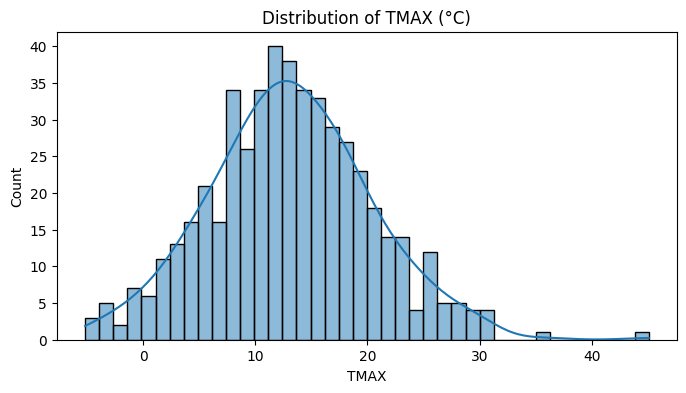

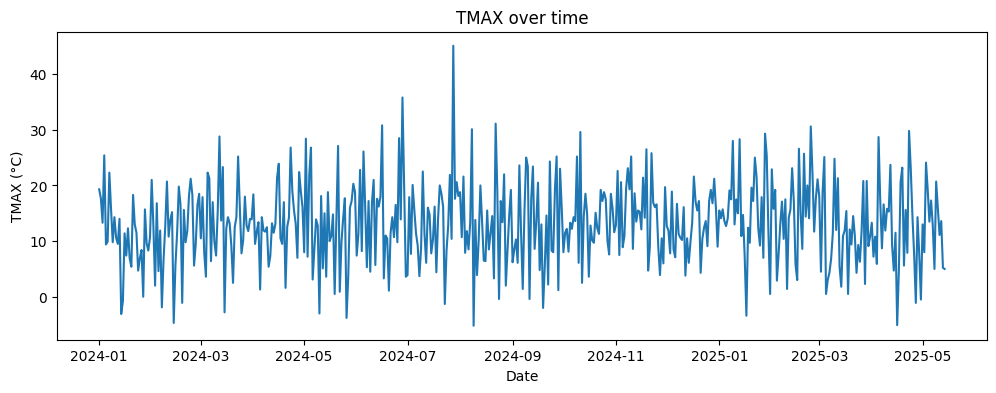

TMIN         0
PRCP         0
SNOW         0
SNWD         0
month        0
dayofyear    0
T_RANGE      0
TMAX         0
dtype: int64


,TMIN,PRCP,SNOW,SNWD,month,dayofyear,T_RANGE
0,8.5,8.6,0,0.0,1,1,10.8
1,4.0,6.7,0,0.0,1,2,13.7
2,9.5,3.2,0,0.0,1,3,3.8
3,15.7,0.4,0,0.3,1,4,9.7
4,3.4,5.8,0,3.5,1,5,6.0


Train shape: (400, 7) Test shape: (100, 7)
Linear Regression trained.
Ridge Regression trained.
Lasso Regression trained.
Bayesian Regression trained.


,Model,R2,RMSE,MAE
0,Linear Regression,1.0000,0.0000,0.0000
1,Ridge Regression,1.0000,0.0190,0.0141
2,Bayesian Regression,1.0000,0.0000,0.0000
3,Lasso Regression,0.9996,0.1451,0.1100


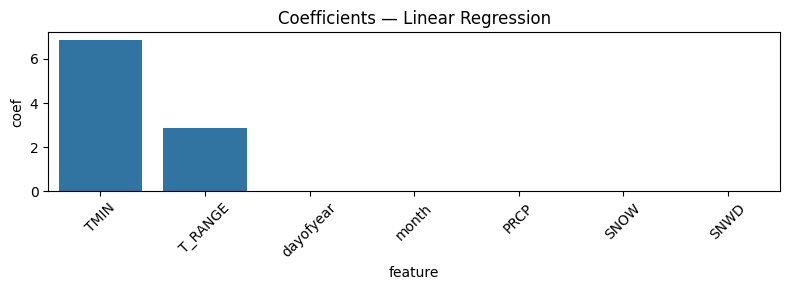

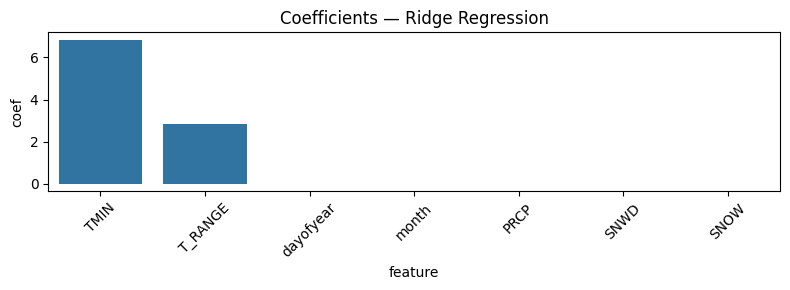

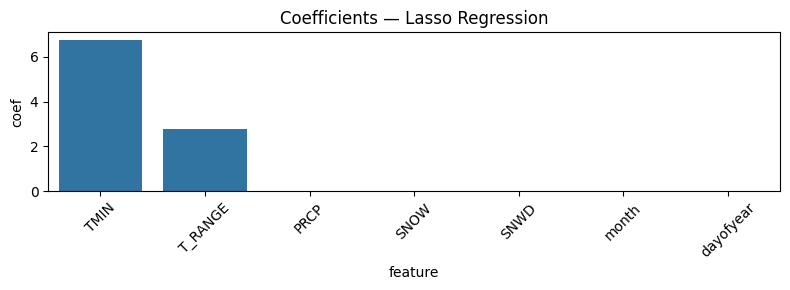

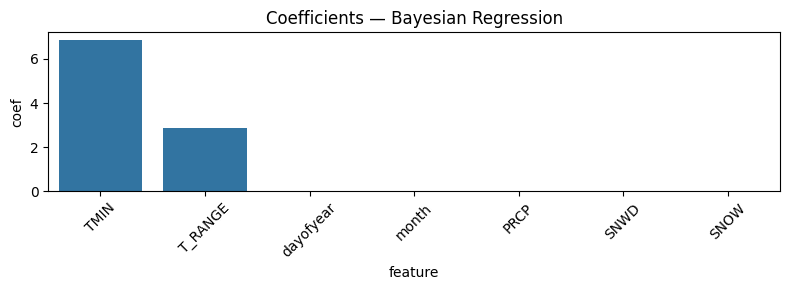

Best model by R2: Linear Regression


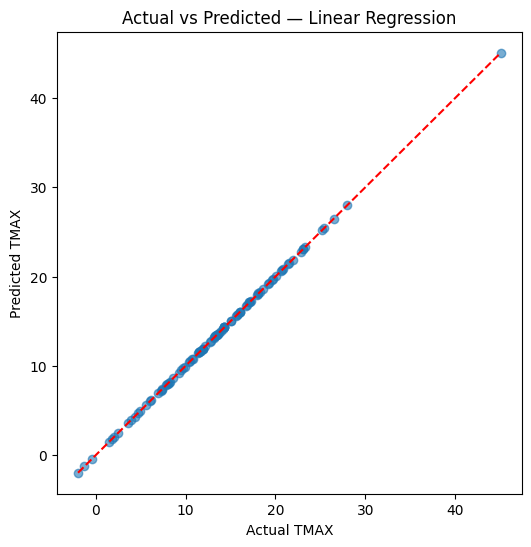

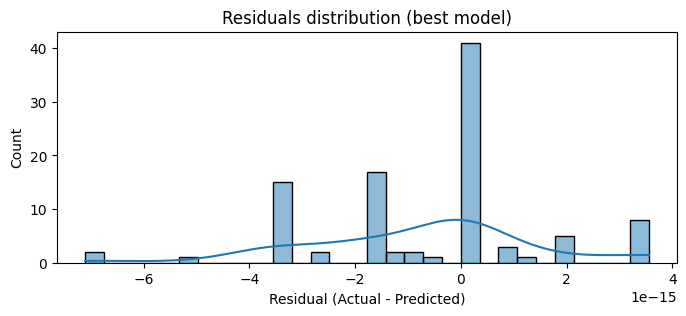

Saved fitted models to noaa_fitted_models.pkl and scaler to noaa_scaler.pkl


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

print('Libraries loaded.')
import os
import pandas as pd
path = "noaa_sample_weather_data.csv"
if not os.path.exists(path):
    raise FileNotFoundError(f"{path} not found. Make sure the CSV is in the working directory.")
df = pd.read_csv(path, parse_dates=['DATE'])
df.rename(columns={'DATE':'DATE'}, inplace=True)  # ensure column name
print('Loaded:', path)
display(df.head())
print('Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nMissing values:\n', df.isnull().sum())

# Quick stats for temperature
display(df[['TMAX','TMIN','PRCP']].describe())

# Distribution of TMAX
plt.figure(figsize=(8,4))
sns.histplot(df['TMAX'], bins=40, kde=True)
plt.title('Distribution of TMAX (°C)')
plt.xlabel('TMAX')
plt.show()
# Time series plot for TMAX
plt.figure(figsize=(12,4))
plt.plot(df['DATE'], df['TMAX'])
plt.title('TMAX over time')
plt.xlabel('Date')
plt.ylabel('TMAX (°C)')
plt.show()
# Date features
data = df.copy()
data['month'] = data['DATE'].dt.month
data['dayofyear'] = data['DATE'].dt.dayofyear
data['day'] = data['DATE'].dt.day

# Optional: temperature range feature
data['T_RANGE'] = data['TMAX'] - data['TMIN']

# Select features and target
features = ['TMIN','PRCP','SNOW','SNWD','month','dayofyear','T_RANGE']
target = 'TMAX'

# Check for missing values in these columns
print(data[features + [target]].isnull().sum())

X = data[features].copy()
y = data[target].copy()

display(X.head())
# Split (random split is acceptable here since synthetic sample has no time-series dependencies)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Bayesian Regression': BayesianRidge()
}

fitted = {}
preds = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    fitted[name] = model
    preds[name] = y_pred
    print(f'{name} trained.')
results = []
for name, y_pred in preds.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append([name, r2, rmse, mae])

results_df = pd.DataFrame(results, columns=['Model','R2','RMSE','MAE'])
results_df[['R2','RMSE','MAE']] = results_df[['R2','RMSE','MAE']].round(4)
results_df = results_df.sort_values('R2', ascending=False).reset_index(drop=True)
display(results_df)
feature_names = features
for name, model in fitted.items():
    if hasattr(model, 'coef_'):
        coefs = model.coef_
        coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
        coef_df['abs'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values('abs', ascending=False)
        plt.figure(figsize=(8,3))
        sns.barplot(data=coef_df, x='feature', y='coef')
        plt.title(f'Coefficients — {name}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
best = results_df.iloc[0]['Model']
print('Best model by R2:', best)
y_pred_best = preds[best]

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual TMAX')
plt.ylabel('Predicted TMAX')
plt.title(f'Actual vs Predicted — {best}')
plt.show()

# Residual plot for best model
res = y_test - y_pred_best
plt.figure(figsize=(8,3))
sns.histplot(res, bins=30, kde=True)
plt.title('Residuals distribution (best model)')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()
joblib.dump(fitted, 'noaa_fitted_models.pkl')
joblib.dump(scaler, 'noaa_scaler.pkl')
print('Saved fitted models to noaa_fitted_models.pkl and scaler to noaa_scaler.pkl')
